- 贝叶斯公式：
$$P(Y|X)=\frac{P(X|Y)P(Y)}{P(X)}$$
    由以下的联合概率公式推导出来：
$$P(Y,X)=P(Y|X)P(X)=P(X|Y)P(Y)$$
    其中$P(Y)$为先验概率，$P(Y|X)$为后验概率，$P(Y,X)$为联合概率
    
           
- 从机器学习的角度，把 `X` 理解成“具有某特征”，把 `Y` 理解成“类别标签”，在最简单的二分类时，将 `Y` 理解成“属于某类”的标签。
$$P(“属于某类”|“具有某特征”)=\frac{P(“具有某特征”|“属于某类”)P(“属于某类”)}{P(“具有某特征”)}$$

> $P(“属于某类”|“具有某特征”)$=在已知某样本“具有某特征”的条件下，该样本“属于某类”的概率。所以叫做『后验概率』。<br/>
$P(“具有某特征”|“属于某类”)$=在已知某样本“属于某类”的条件下，该样本“具有某特征”的概率。<br/>
$P(“属于某类”)$=（在未知某样本具有该“具有某特征”的条件下，）该样本“属于某类”的概率。所以叫做『先验概率』。<br/>
$P(“具有某特征”)$=(在未知某样本“属于某类”的条件下，)该样本“具有某特征”的概率。


     
- 垃圾邮件识别，即求 $P(“垃圾邮件”|“具有某特征”)$
> `example` = "我司可办理正规发票（保真）17%增值税发票点数优惠！"
$P(“垃圾邮件”|example) = \frac{垃圾邮件中出现 example 的次数}{垃圾邮件中出现 example 的次数+正常邮件中出现 example 的次数}$

    - 实际情况，邮件中句子的可能性是无限的，特定句子出现的概率非常小；但组成句子的词语却是有限的
    > $P(“正常邮件”|(“我”,“司”,“可”,“办理”,“正规发票”,“保真”,“增值税”,“发票”,“点数”,“优惠”) = \frac{P((“我”,“司”,“可”,“办理”,“正规发票”,“保真”,“增值税”,“发票”,“点数”,“优惠”)|"正常邮件")P(“正常邮件”)}{P((“我”,“司”,“可”,“办理”,“正规发票”,“保真”,“增值税”,“发票”,“点数”,“优惠”))}$

- 条件独立假设
> $P((“我”,“司”,“可”,“办理”,“正规发票”,“保真”,“增值税”,“发票”,“点数”,“优惠”)|“正常邮件”) = P(“我”|“正常邮件”)P(“司”|“正常邮件”)...P(“优惠”|“正常邮件”)$

- 贝叶斯方程加上条件独立假设就是朴素贝叶斯方法`(NaiveBayes)`
    - 句子概率变成了单词概率的连乘，单词的顺序对结果无影响；朴素贝叶斯失去了单词之间的顺序信息。词袋模型`(bag of words)`
    
    
    
- 邮件中重复的词，计算多次概率，**多项式模型**
- 将重复的词语都视为其只出现 1 次，**伯努利模型（又称为二项独立模型）**；丢失了词频信息
- 计算句子概率时，不考虑重复词语出现的次数；但在统计词语的概率 $P(“词语”|“垃圾邮件”)$，考虑重复词语的出现次数；**混合模型**

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

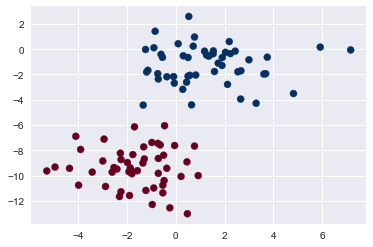

In [3]:
from sklearn.datasets import make_blobs


x,y=make_blobs(100,2,centers=2,random_state=2,cluster_std=1.5)
plt.scatter(x[:,0],x[:,1],c=y,s=50,cmap='RdBu')

In [4]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(x,y)

GaussianNB(priors=None)

In [5]:
rng=np.random.RandomState(0)
xnew=[-6,-14]+[14,18]*rng.rand(2000,2)
ynew=model.predict(xnew)

(-5.902170524311957, 7.789182875858786, -13.793829460308247, 3.381339464828492)

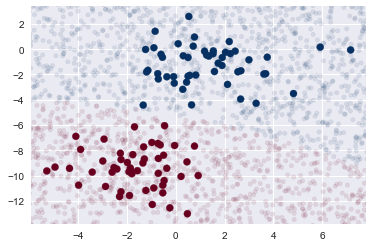

In [7]:
plt.scatter(x[:,0],x[:,1],c=y,s=50,cmap='RdBu')
lim = plt.axis()

plt.scatter(xnew[:,0],xnew[:,1],c=ynew,s=20,cmap="RdBu",alpha=0.1)
plt.axis(lim)

In [10]:
yprob=model.predict_proba(xnew)
yprob[-8:].round(2)

## 计算每个点各属于哪一类的概率

array([[0.89, 0.11],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.15, 0.85]])

In [11]:
## Multinomial Naive Bayes
## Example: Classifying Text

In [12]:
from sklearn.datasets import fetch_20newsgroups

data=fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [13]:
categories = ['talk.religion.misc', 'soc.religion.christian',
              'sci.space', 'comp.graphics']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

In [18]:
print(train.data[5])

From: dmcgee@uluhe.soest.hawaii.edu (Don McGee)
Subject: Federal Hearing
Originator: dmcgee@uluhe
Organization: School of Ocean and Earth Science and Technology
Distribution: usa
Lines: 10


Fact or rumor....?  Madalyn Murray O'Hare an atheist who eliminated the
use of the bible reading and prayer in public schools 15 years ago is now
going to appear before the FCC with a petition to stop the reading of the
Gospel on the airways of America.  And she is also campaigning to remove
Christmas programs, songs, etc from the public schools.  If it is true
then mail to Federal Communications Commission 1919 H Street Washington DC
20054 expressing your opposition to her request.  Reference Petition number

2493.



In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model=make_pipeline(TfidfVectorizer(),MultinomialNB())

In [21]:
model.fit(train.data,train.target)

labels=model.predict(test.data)

Text(92.68,0.5,'predicted label')

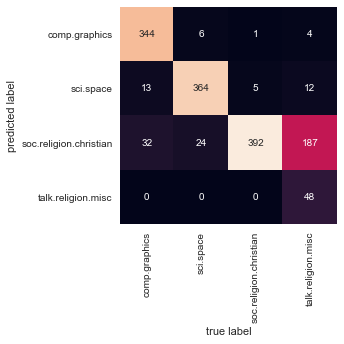

In [22]:
from sklearn.metrics import confusion_matrix
mat=confusion_matrix(test.target,labels)
sns.heatmap(mat.T,square=True,annot=True,fmt='d',cbar=False,
           xticklabels=train.target_names,yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

In [23]:
def predict_category(s,train=train,model=model):
    pred=model.predict([s])
    return(train.target_names[pred[0]])

In [24]:
predict_category('sending a payload to the ISS')

'sci.space'

In [25]:
predict_category('discussing islam vs atheism')

'soc.religion.christian'

In [26]:
predict_category('determining the screen resolution')

'comp.graphics'

#### When to Use Naive Bayes!!!

- When the naive assumptions actually match the data (very rare in practice)
- For very well-separated categories, when model complexity is less important
- For very high-dimensional data, when model complexity is less important

In [ ]:
p(x)p(y|x)=p(y)p(x|y)

# 文本分类问题
- 新闻主题分类

In [1]:
import os
import time 
import random
import jieba
import sklearn
from sklearn.naive_bayes import MultinomialNB
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt

In [2]:
# 词汇表
def make_word_set(words_file):
    words_set = set()
    with open(words_file, 'r') as f:
        for line in f.readlines():
            word = line.strip().decode("utf-8")
            if len(word) > 0 and word not in words_set:
                words_set.add(word)
    return words_set

In [3]:
# 文本处理
def text_processing(folder_path, test_size=0.2):
    folder_list = os.listdir(folder_path)
    data_list = []
    class_list = []

    # 遍历文件夹
    for folder in folder_list:
        new_folder_path = os.path.join(folder_path, folder)
        files = os.listdir(new_folder_path)
        # 读取文件
        j = 1
        for file in files:
            if j > 100:  # 怕内存爆掉，只取100个样本文件，你可以注释掉取完
                break
            with open(os.path.join(new_folder_path, file), 'r') as fp:
                raw = fp.read()
            ## 是的，随处可见的jieba中文分词
            jieba.enable_parallel(4)  # 开启并行分词模式，参数为并行进程数，不支持windows
            word_cut = jieba.cut(raw,
                                 cut_all=False)  # 精确模式，返回的结构是一个可迭代的genertor
            word_list = list(word_cut)  # genertor转化为list，每个词unicode格式
            jieba.disable_parallel()  # 关闭并行分词模式

            data_list.append(word_list)  #训练集list
            class_list.append(folder.decode('utf-8'))  #类别
            j += 1

    ## 粗暴地划分训练集和测试集
    data_class_list = zip(data_list, class_list)
    random.shuffle(data_class_list)
    index = int(len(data_class_list) * test_size) + 1
    train_list = data_class_list[index:]
    test_list = data_class_list[:index]
    train_data_list, train_class_list = zip(*train_list)
    test_data_list, test_class_list = zip(*test_list)

    #其实可以用sklearn自带的部分做
    #train_data_list, test_data_list, train_class_list, test_class_list = sklearn.cross_validation.train_test_split(data_list, class_list, test_size=test_size)

    # 统计词频放入all_words_dict
    all_words_dict = {}
    for word_list in train_data_list:
        for word in word_list:
            if all_words_dict.has_key(word):
                all_words_dict[word] += 1
            else:
                all_words_dict[word] = 1

    # key函数利用词频进行降序排序
    all_words_tuple_list = sorted(all_words_dict.items(),
                                  key=lambda f: f[1],
                                  reverse=True)  # 内建函数sorted参数需为list
    all_words_list = list(zip(*all_words_tuple_list)[0])

    return all_words_list, train_data_list, test_data_list, train_class_list, test_class_list

In [4]:
def words_dict(all_words_list, deleteN, stopwords_set=set()):
    # 选取特征词
    feature_words = []
    n = 1
    for t in range(deleteN, len(all_words_list), 1):
        if n > 1000:  # feature_words的维度1000
            break

        if not all_words_list[t].isdigit() and all_words_list[
                t] not in stopwords_set and 1 < len(all_words_list[t]) < 5:
            feature_words.append(all_words_list[t])
            n += 1
    return feature_words

In [5]:
# 文本特征
def text_features(train_data_list, test_data_list, feature_words, flag='nltk'):
    def text_features(text, feature_words):
        text_words = set(text)
        ## -----------------------------------------------------------------------------------
        if flag == 'nltk':
            ## nltk特征 dict
            features = {
                word: 1 if word in text_words else 0
                for word in feature_words
            }
        elif flag == 'sklearn':
            ## sklearn特征 list
            features = [
                1 if word in text_words else 0 for word in feature_words
            ]
        else:
            features = []
        ## -----------------------------------------------------------------------------------
        return features

    train_feature_list = [
        text_features(text, feature_words) for text in train_data_list
    ]
    test_feature_list = [
        text_features(text, feature_words) for text in test_data_list
    ]
    return train_feature_list, test_feature_list

In [6]:
# 分类，同时输出准确率等
def text_classifier(train_feature_list,
                    test_feature_list,
                    train_class_list,
                    test_class_list,
                    flag='nltk'):
    ## -----------------------------------------------------------------------------------
    if flag == 'nltk':
        ## 使用nltk分类器
        train_flist = zip(train_feature_list, train_class_list)
        test_flist = zip(test_feature_list, test_class_list)
        classifier = nltk.classify.NaiveBayesClassifier.train(train_flist)
        test_accuracy = nltk.classify.accuracy(classifier, test_flist)
    elif flag == 'sklearn':
        ## sklearn分类器
        classifier = MultinomialNB().fit(train_feature_list, train_class_list)
        test_accuracy = classifier.score(test_feature_list, test_class_list)
    else:
        test_accuracy = []
    return test_accuracy

In [ ]:
print "start"

## 文本预处理
folder_path = 'datasets/SogouC/Sample'
all_words_list, train_data_list, test_data_list, train_class_list, test_class_list = text_processing(
    folder_path, test_size=0.2)

# 生成stopwords_set
stopwords_file = 'datasets/stopwords_cn.txt'
stopwords_set = make_word_set(stopwords_file)

## 文本特征提取和分类
# flag = 'nltk'
flag = 'sklearn'
deleteNs = range(0, 1000, 20)
test_accuracy_list = []
for deleteN in deleteNs:
    # feature_words = words_dict(all_words_list, deleteN)
    feature_words = words_dict(all_words_list, deleteN, stopwords_set)
    train_feature_list, test_feature_list = text_features(
        train_data_list, test_data_list, feature_words, flag)
    test_accuracy = text_classifier(train_feature_list, test_feature_list,
                                    train_class_list, test_class_list, flag)
    test_accuracy_list.append(test_accuracy)
print test_accuracy_list

# 结果评价
#plt.figure()
plt.plot(deleteNs, test_accuracy_list)
plt.title('Relationship of deleteNs and test_accuracy')
plt.xlabel('deleteNs')
plt.ylabel('test_accuracy')
plt.show()
#plt.savefig('result.png')

print "finished"